*   **Nama : SALMA NATASYA AZZAHRA**
*   **No.Regis : 1494037162100-2431**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import library and read datasets
import pandas as pd
import re
import tensorflow as tf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df.head()

,label,tweet
0,1,rt @napqilla no ambisinya menguasai raky...
1,1,rt @pandji nah gue pikir sentimen petahana ok...
2,1,rt @pandji urutan pertama best moment #debat ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...
4,0,rt @mrtampi agus makin santai nahok makin sa...


In [2]:
df.tail()

,label,tweet
1045,0,rt @cherrybelleindo kalo ada yg belom liat ba...
1046,1,wajar rachmawati tersinggung megawati bawa a...
1047,1,soal quran polisi harus cari saksi yang denga...
1048,1,najwa kenapa mau jadi gubernur jakarta? n...
1049,1,rt @semiaji w abdee slank kan dari dulu duku...


In [3]:
#Checking for null values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [4]:
# Cleaning text twitter
def preprocessor(data):
    corpus = []
    for i in range(len(data)):
        # remove urls
        tweet = re.sub(r'http\S+', ' ', data[i])
        # remove html tags
        tweet = re.sub(r'<.*?>', ' ', tweet)
        #remove @...
        tweet = re.sub('@\w+([-.]\w+)*', ' ', tweet)
        #remove &...
        tweet = re.sub('&\w+([-.]\w+)*', ' ', tweet)
        # remove digits
        tweet = re.sub(r'\d+', ' ', tweet)
        # remove hashtags
        tweet = re.sub(r'#\w+', ' ', tweet)
        review = re.sub('[^a-zA-Z]', ' ', tweet)
        review = review.lower()
        review = review.split()
        corpus.append(review)
    return corpus

In [5]:
df['CleanTweet'] = preprocessor(df['tweet'])
df

,label,tweet,CleanTweet
0,1,rt @napqilla no ambisinya menguasai raky...,"[rt, no, ambisinya, menguasai, rakyat, no, amb..."
1,1,rt @pandji nah gue pikir sentimen petahana ok...,"[rt, nah, gue, pikir, sentimen, petahana, oke,..."
2,1,rt @pandji urutan pertama best moment #debat ...,"[rt, urutan, pertama, best, moment, pilkadadki..."
3,1,rt @pandji ini artikel yg menjelaskan ternyat...,"[rt, ini, artikel, yg, menjelaskan, ternyata, ..."
4,0,rt @mrtampi agus makin santai nahok makin sa...,"[rt, agus, makin, santai, nahok, makin, santun..."
...,...,...,...
1045,0,rt @cherrybelleindo kalo ada yg belom liat ba...,"[rt, kalo, ada, yg, belom, liat, batik, cherry..."
1046,1,wajar rachmawati tersinggung megawati bawa a...,"[wajar, rachmawati, tersinggung, megawati, baw..."
1047,1,soal quran polisi harus cari saksi yang denga...,"[soal, quran, polisi, harus, cari, saksi, yang..."
1048,1,najwa kenapa mau jadi gubernur jakarta? n...,"[najwa, kenapa, mau, jadi, gubernur, jakarta, ..."


In [6]:
# View class variables using .unique()
df['label'].unique()

array([1, 0])

In [7]:
# Perform one-hot-encoding and create a new dataframe
label = pd.get_dummies(df.label)
df_new = pd.concat([df, label], axis=1)
df_new = df_new.drop(columns='label')
df_new

,tweet,CleanTweet,0,1
0,rt @napqilla no ambisinya menguasai raky...,"[rt, no, ambisinya, menguasai, rakyat, no, amb...",0,1
1,rt @pandji nah gue pikir sentimen petahana ok...,"[rt, nah, gue, pikir, sentimen, petahana, oke,...",0,1
2,rt @pandji urutan pertama best moment #debat ...,"[rt, urutan, pertama, best, moment, pilkadadki...",0,1
3,rt @pandji ini artikel yg menjelaskan ternyat...,"[rt, ini, artikel, yg, menjelaskan, ternyata, ...",0,1
4,rt @mrtampi agus makin santai nahok makin sa...,"[rt, agus, makin, santai, nahok, makin, santun...",1,0
...,...,...,...,...
1045,rt @cherrybelleindo kalo ada yg belom liat ba...,"[rt, kalo, ada, yg, belom, liat, batik, cherry...",1,0
1046,wajar rachmawati tersinggung megawati bawa a...,"[wajar, rachmawati, tersinggung, megawati, baw...",0,1
1047,soal quran polisi harus cari saksi yang denga...,"[soal, quran, polisi, harus, cari, saksi, yang...",0,1
1048,najwa kenapa mau jadi gubernur jakarta? n...,"[najwa, kenapa, mau, jadi, gubernur, jakarta, ...",0,1


In [9]:
# Converts the values ​​from the dataframe into the numpy array data type using .values()
oritweet = df_new['CleanTweet'].values
sentimen = df_new[[1, 0]].values #1= positif 0= negatif

In [10]:
# Divide the data into training data and testing data
oritweet_latih, oritweet_test, sentimen_latih, sentimen_test = train_test_split(oritweet, sentimen, test_size=0.2)

In [11]:
# Convert each word in the dataset into a numeric number with the Tokenizer function
tokenizer = Tokenizer(num_words=10000, oov_token='<oov>')
tokenizer.fit_on_texts(oritweet_latih) 
tokenizer.fit_on_texts(oritweet_test)
 
sekuens_latih = tokenizer.texts_to_sequences(oritweet_latih)
sekuens_test = tokenizer.texts_to_sequences(oritweet_test)
 
padded_latih = pad_sequences(sekuens_latih,padding='post',
                             maxlen=20,truncating='post') 
padded_test = pad_sequences(sekuens_test,padding='post',
                             maxlen=20,truncating='post')

In [12]:
# Callback Function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
# Creating a model architecture using layers Embedding and LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax') #dense 2 karena hanya ada 1 dan 0 pada label
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
# Train the model by calling the function .fit()
num_epochs = 20
history = model.fit(padded_latih, sentimen_latih, epochs=num_epochs,validation_data=(padded_test, sentimen_test), verbose=2)

Epoch 1/20
27/27 - 0s - loss: 0.0895 - accuracy: 0.9560 - val_loss: 1.1252 - val_accuracy: 0.7667 - 421ms/epoch - 16ms/step
Epoch 2/20
27/27 - 0s - loss: 0.0955 - accuracy: 0.9536 - val_loss: 1.3698 - val_accuracy: 0.7857 - 451ms/epoch - 17ms/step
Epoch 3/20
27/27 - 0s - loss: 0.0882 - accuracy: 0.9536 - val_loss: 1.4644 - val_accuracy: 0.7857 - 416ms/epoch - 15ms/step
Epoch 4/20
27/27 - 0s - loss: 0.0851 - accuracy: 0.9536 - val_loss: 1.6218 - val_accuracy: 0.7762 - 225ms/epoch - 8ms/step
Epoch 5/20
27/27 - 0s - loss: 0.0868 - accuracy: 0.9560 - val_loss: 1.4697 - val_accuracy: 0.7905 - 230ms/epoch - 9ms/step
Epoch 6/20
27/27 - 0s - loss: 0.0925 - accuracy: 0.9631 - val_loss: 1.5305 - val_accuracy: 0.7667 - 229ms/epoch - 8ms/step
Epoch 7/20
27/27 - 0s - loss: 0.0892 - accuracy: 0.9524 - val_loss: 1.7194 - val_accuracy: 0.7762 - 232ms/epoch - 9ms/step
Epoch 8/20
27/27 - 0s - loss: 0.0830 - accuracy: 0.9536 - val_loss: 1.6778 - val_accuracy: 0.7857 - 228ms/epoch - 8ms/step
Epoch 9/20
27

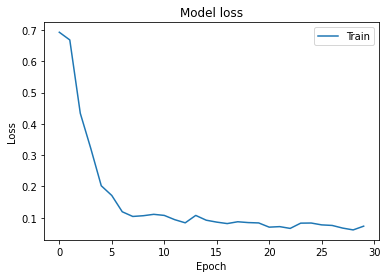

In [15]:
# plot loss and accuracy during training and validation.
# Plot Loss Training
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

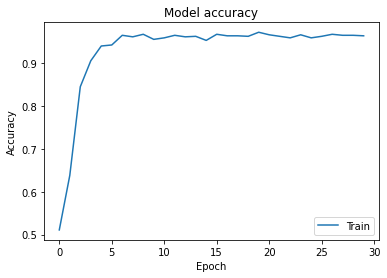

In [16]:
# Plot Accuracy Training
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()